In [ ]:
#1
Соберите все данные из папки data в один датафрэйм, имеющий 
следующие столбцы: колонки из самих файлов (product_id, quantity),
а также имя пользователя (name), и дата этих покупок 
(date, соответствует названию папки, где лежит папка с пользователем)

In [104]:
import pandas as pd
import os

In [105]:
path = 'C:/Users/yana2/Рабочий стол/data'

In [5]:
  os.listdir ('C:/Users/yana2/Рабочий стол/data/2020-12-04/Petr_Ivanov/')

['data.csv']

In [6]:
list (os.walk (path))

[('C:/Users/yana2/Рабочий стол/data',
  ['2020-12-03',
   '2020-12-04',
   '2020-12-05',
   '2020-12-06',
   '2020-12-07',
   '2020-12-08',
   '2020-12-09'],
  []),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03',
  ['Alexey_Smirnov',
   'Anton_Petrov',
   'Kirill_Petrov',
   'Petr_Fedorov',
   'Vasiliy_Ivanov',
   'Vasiliy_Petrov'],
  []),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03\\Alexey_Smirnov',
  [],
  ['data.csv']),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03\\Anton_Petrov',
  [],
  ['data.csv']),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03\\Kirill_Petrov',
  [],
  ['data.csv']),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03\\Petr_Fedorov',
  [],
  ['data.csv']),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03\\Vasiliy_Ivanov',
  [],
  ['data.csv']),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-03\\Vasiliy_Petrov',
  [],
  ['data.csv']),
 ('C:/Users/yana2/Рабочий стол/data\\2020-12-04',
  ['Alexey_Smirnov',
   'Kirill_Fedorov',
   'Petr_Fedorov',
   'Petr_Ivanov'

In [7]:
path_col = 'C:/Users/yana2/Рабочий стол/data'.split('/') 
path_col


['C:', 'Users', 'yana2', 'Рабочий стол', 'data']

In [115]:
path_parts = current_path.split('\\')
path_parts

['C:/Users/yana2/Рабочий стол/data', '2020-12-09', 'Vasiliy_Ivanov']

In [14]:
# create df for all data
df = pd.DataFrame()
#read data from all files and add it to general df
for current_path,dirs,files in os.walk (path): 
     for file in files:
        data_path = (f'{current_path}/{file}')
        
        #date,name
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
        temp_df = pd.read_csv(data_path)
        temp_df['date'] = date
        temp_df['name'] = name
        df = pd.concat((df, temp_df))
#         print (df.shape)
    
    

# print(current_path,dirs,files)
    

In [ ]:
#different way

In [116]:
from pathlib import Path

In [117]:
path = Path('C:/Users/yana2/Рабочий стол/data')

In [128]:
# create df for all data
df = pd.DataFrame()
#read data from all files and add it to general df
for current_path,dirs,files in os.walk (path): 
    for file in files:
        part_path= Path(current_path)
        data_path = part_path/file
        #date,name
        temp_df = pd.read_csv(data_path)
        
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        temp_df['date'] = date
        temp_df['name'] = name
        df = pd.concat((df, temp_df))
#         print (df.shape)
    
    

# print(current_path,dirs,files)
    

In [129]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
1,1,66,4,2020-12-09,Rostislav_Petrov
2,2,39,2,2020-12-09,Rostislav_Petrov
0,0,82,4,2020-12-09,Vasiliy_Ivanov
1,1,74,2,2020-12-09,Vasiliy_Ivanov


In [125]:
data_path.name

'data.csv'

In [127]:
data_path.parts [-2]

'Vasiliy_Ivanov'

In [15]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [16]:
 df.reset_index(drop=True,inplace = True)

In [17]:
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


In [18]:
#2
Выясните, какой пользователь купил больше всего товаров.
Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

SyntaxError: invalid syntax (Temp/ipykernel_11212/3716241356.py, line 2)

In [19]:
df_quantity =df.groupby('name', as_index = False) \
            .agg({'quantity':'sum'}) \
            .sort_values ('quantity', ascending=False)
df_quantity.reset_index(drop=True, inplace=True)
df_quantity = df_quantity.head(2)

In [20]:
df_quantity

,name,quantity
0,Alexey_Smirnov,52
1,Petr_Smirnov,52


In [21]:
top_client = ','.join(df_quantity.name)
top_client

'Alexey_Smirnov,Petr_Smirnov'

In [22]:
#3
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
Сколько было продано единиц товара с product_id==56?

SyntaxError: invalid syntax (Temp/ipykernel_11212/3093815954.py, line 2)

In [23]:
top_10 =df.groupby('product_id', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values ('quantity', ascending=False) \
    .head(10)
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

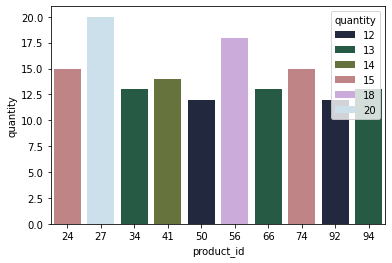

In [25]:
sns.barplot(data = top_10, x= 'product_id', y ='quantity',palette = 'cubehelix', alpha = 0.99, hue='quantity',dodge=False )


In [26]:
#4
Визуализируйте продажи по дням.

SyntaxError: invalid syntax (Temp/ipykernel_11212/3260147631.py, line 2)

In [131]:
df['date']= pd.to_datetime(df.date) 


In [132]:
df ['day'] = df.date.dt.day

In [136]:
data = df.groupby ('day',as_index=True) \
   .agg({'quantity':'sum'}) 
data

,quantity
day,
3,60
4,113
5,61
6,15
7,94
8,68
9,69


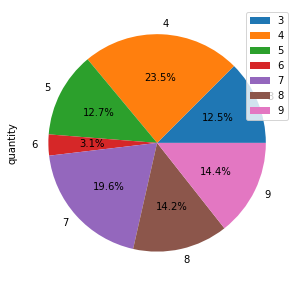

In [139]:
plot = data.plot.pie(subplots = True, figsize=(5, 5), autopct='%1.1f%%')

<AxesSubplot:xlabel='day'>

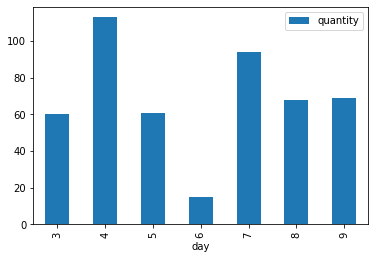

In [141]:
#or
data.plot(kind='bar')

In [ ]:
#5
Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [68]:
df

,product_id,quantity,date,name,day
0,47,1,2020-12-03,Alexey_Smirnov,3
1,57,1,2020-12-03,Alexey_Smirnov,3
2,14,2,2020-12-03,Alexey_Smirnov,3
3,52,1,2020-12-03,Alexey_Smirnov,3
4,1,4,2020-12-03,Alexey_Smirnov,3
...,...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov,9
157,39,2,2020-12-09,Rostislav_Petrov,9
158,82,4,2020-12-09,Vasiliy_Ivanov,9
159,74,2,2020-12-09,Vasiliy_Ivanov,9


In [91]:
user_repeat = df.query('quantity > 1') \
                .groupby('product_id', as_index=False) \
                .agg({'quantity':'count', 'name':'count'}) \
                .sort_values ('quantity', ascending=False) 

user_repeat.reset_index(drop=True, inplace=True)
user_repeat
   

,product_id,quantity,name
0,27,5,5
1,74,4,4
2,66,4,4
3,24,4,4
4,56,4,4
...,...,...,...
61,49,1,1
62,54,1,1
63,61,1,1
64,70,1,1


In [143]:
df.groupby(['name','product_id']) \
    .agg({'date':pd.Series.nunique}) \
    .query('date>1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
